In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

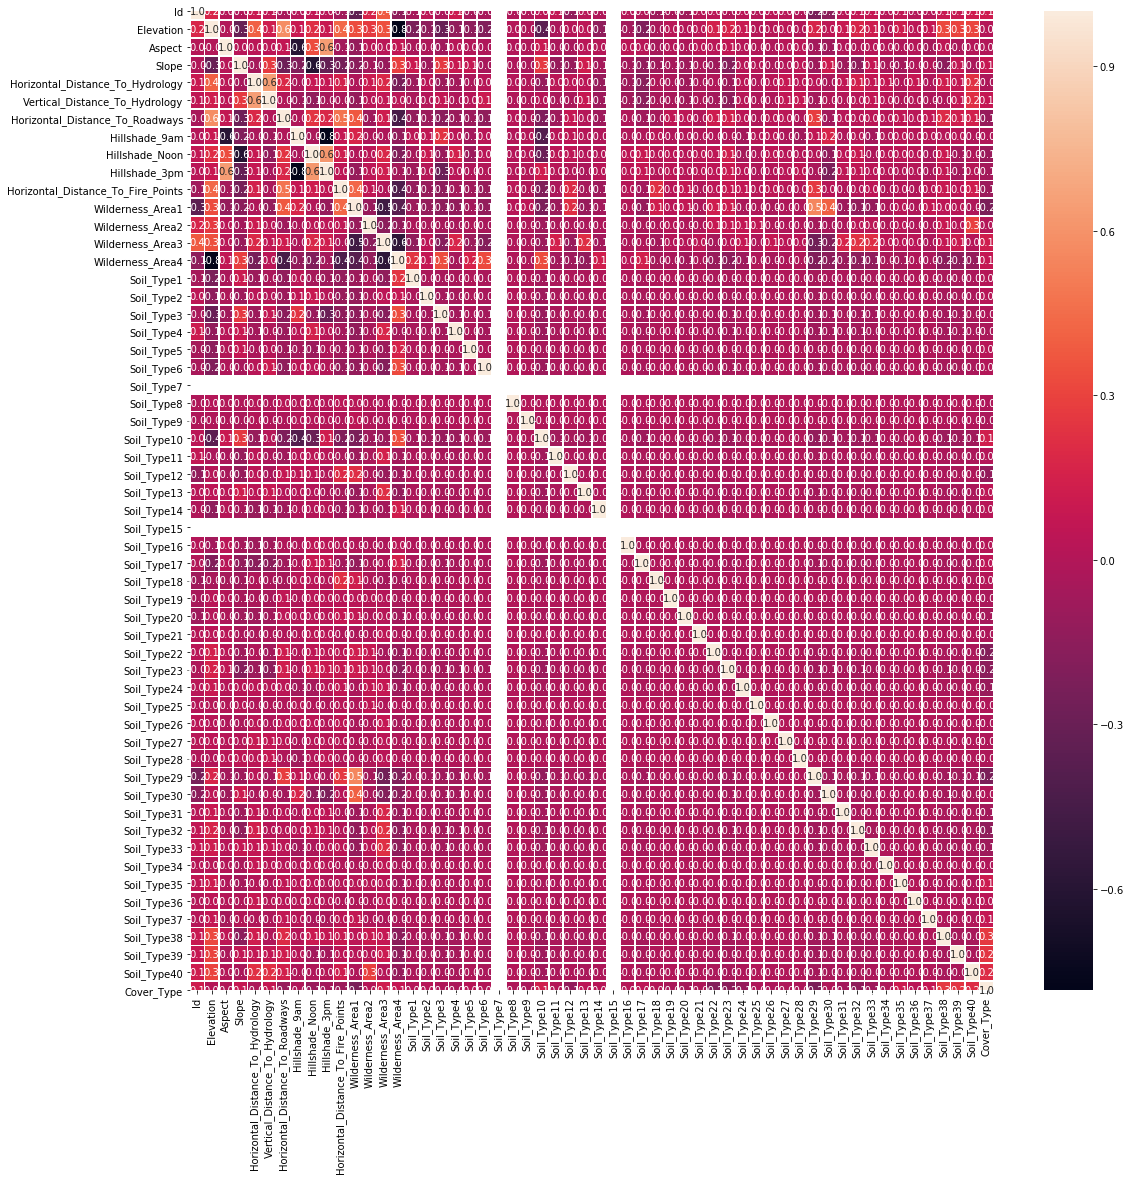

In [12]:
# Code starts here
train= pd.read_csv('train.csv')
X = train.drop(['Id','Cover_Type'], axis=1)
y= train['Cover_Type']
X.head()

train.isnull().sum()

train.describe()
X.shape

# plt.figure(figsize=(7,5))
# X.hist(column='Soil_Type7')

# Code ends here.
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C86F4CA188>]],
      dtype=object)

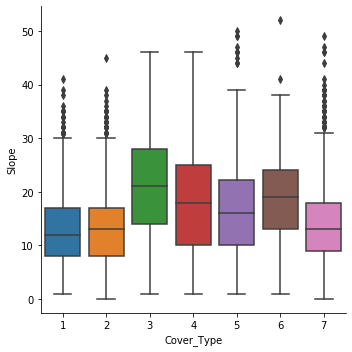

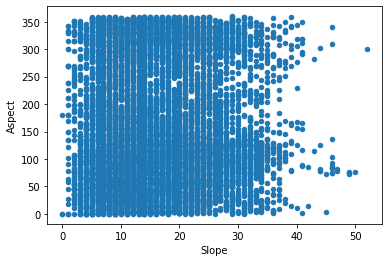

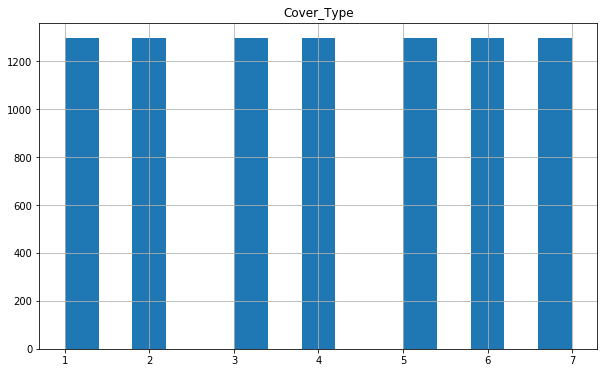

In [3]:
# Code starts here
sns.catplot(x='Cover_Type', y='Slope', kind='box', data=train) #, aspect=2.5, height=5
# sns.catplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', kind='box', data=train) #, aspect=2.5, height=5
# sns.catplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', kind='box', data=train) #, aspect=2.5, height=5
# sns.catplot(x='Cover_Type', y='Elevation', kind='box', data=train) #, aspect=2.5, height=5

# #sns.catplot(x='Cover_Type', y='Elevation', kind='swarm', data=train) #, aspect=2.5, height=5

train.plot.scatter(x='Slope',y='Aspect')

#train.corr()
train.hist(column='Cover_Type',bins=15, figsize=(10,6))
#sns.distplot(train['Elevation'])
# Code ends here

In [7]:
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

tuned_parameters = {'estimator__C': [0.1, 1, 10, 100, 1000]}  


X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=42, random_state=0)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model=OneVsRestClassifier(SVC())

loggrid = GridSearchCV(model, tuned_parameters)
loggrid.fit(X_train_pca,y_train)
pre = loggrid.predict(X_test_pca)

accuracy_score(pre, y_test)

0.8038207200587804

In [12]:
test= pd.read_csv('test.csv')
ttest = test.drop('Id',axis=1)
ttest_scaled = scaler.transform(ttest)

trans = pca.transform(ttest_scaled)

pred = loggrid.predict(trans)

file = pd.DataFrame({'Id': test.Id, 'Cover_Type': pred})
file.to_csv('testsubmit8.csv', index=False)
file

,Id,Cover_Type
0,6376,5
1,8962,7
2,7122,5
3,931,2
4,3678,6
...,...,...
6043,3982,4
6044,8524,6
6045,4332,4
6046,4935,4
